In [1]:
# change into root directory to the project
import os
if os.getcwd().split("/")[-1] == "examples":
    print("chdir")
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.hopf import HopfModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.fitparams as fp

# Single node simulation

In [4]:
hopfModel = HopfModel()
hopfModel.params['duration'] = 1.0*1000
hopfModel.params['sigma_ou'] = 0.03

hopfModel.run()

Text(0, 0.5, 'Activity')

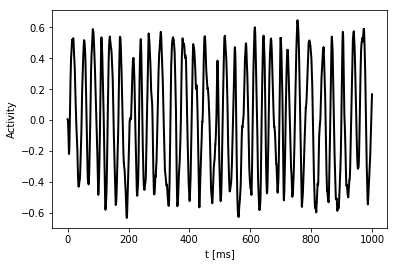

In [5]:
plt.plot(hopfModel.t, hopfModel.x.T, c='k', lw = 2)
# alternatively plot the results in the xarray:
# plt.plot(hopfModel.xr[0, 0].time, hopfModel.xr[0, 0].values)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

# Brain network

In [6]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [7]:
hopfModel = HopfModel(Cmat = ds.Cmat, Dmat = ds.Dmat, simulateChunkwise=True)

In [8]:
hopfModel.params['w'] = 1.0
hopfModel.params['signalV'] = 0
hopfModel.params['duration'] = 20 * 1000 
hopfModel.params['sigma_ou'] = 0.14
hopfModel.params['K_gl'] = 0.6

hopfModel.run()

Text(0.5, 0, 't [ms]')

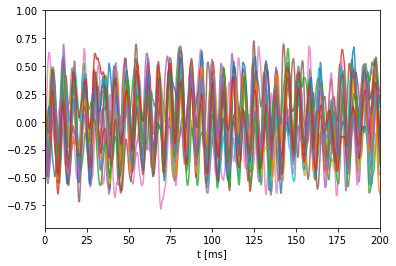

In [9]:
plt.plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

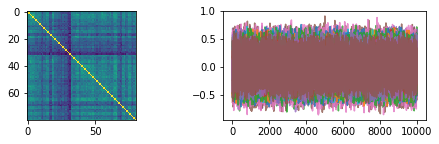

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(hopfModel.x[:, -10000:]))
axs[1].plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);

In [11]:
scores = []
for i in range(len(ds.FCs)):
    fc_score = func.matrix_correlation(func.fc(hopfModel.x[:, -int(5000/hopfModel.params['dt']):]), ds.FCs[i])
    scores.append(fc_score)
    print("Dataset {} correlation: {:.2f}". format(i, fc_score))
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Dataset 0 correlation: 0.57
Dataset 1 correlation: 0.45
Dataset 2 correlation: 0.53
Dataset 3 correlation: 0.50
Dataset 4 correlation: 0.47
Dataset 5 correlation: 0.42
Dataset 6 correlation: 0.63
Dataset 7 correlation: 0.52
Dataset 8 correlation: 0.65
Dataset 9 correlation: 0.59
Dataset 10 correlation: 0.51
Dataset 11 correlation: 0.48
Dataset 12 correlation: 0.51
Dataset 13 correlation: 0.45
Dataset 14 correlation: 0.66
Dataset 15 correlation: 0.54
Dataset 16 correlation: 0.54
Dataset 17 correlation: 0.42
Dataset 18 correlation: 0.52
Dataset 19 correlation: 0.56
Dataset 20 correlation: 0.56
Dataset 21 correlation: 0.56
Dataset 22 correlation: 0.46
Dataset 23 correlation: 0.62
Dataset 24 correlation: 0.36
Dataset 25 correlation: 0.47
Dataset 26 correlation: 0.64
Dataset 27 correlation: 0.47
Dataset 28 correlation: 0.47
Dataset 29 correlation: 0.50
Dataset 30 correlation: 0.59
Dataset 31 correlation: 0.47
Dataset 32 correlation: 0.47
Dataset 33 correlation: 0.67
Dataset 34 correlation: 